# Avocado Prices EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import plotly.offline as py
import plotly.graph_objs as go
from numbers import Number
from scipy import stats
import datetime

pd.options.plotting.backend = "plotly"
pd.options.display.max_columns = 100
py.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('avocado.csv')
df.shape

(18249, 14)

In [3]:
df.tail(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


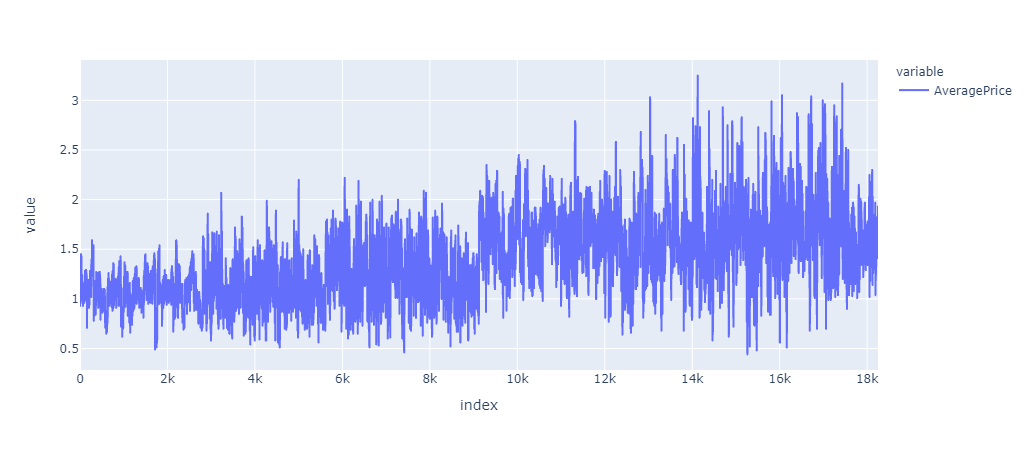

In [4]:
df['AveragePrice'].plot()

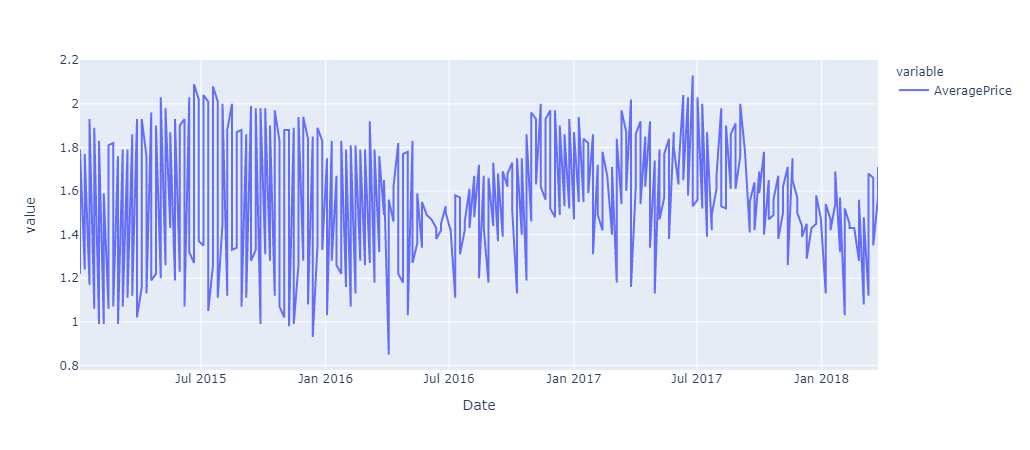

In [5]:
df['Date'] = pd.to_datetime(df["Date"])

albany_df = df.copy()[df['region']=='Albany']
albany_df.set_index('Date', inplace=True)
albany_df.sort_index(inplace=True)
albany_df['AveragePrice'].plot()

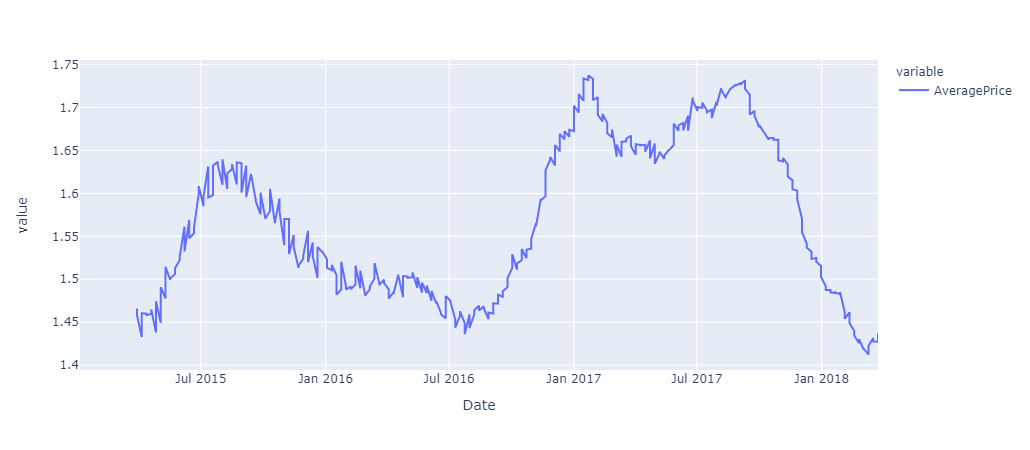

In [6]:
albany_df.index

albany_df['AveragePrice'].rolling(25).mean().plot()

In [7]:
albany_df['Price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

In [8]:
albany_df.tail()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Price25ma
Date,,,,,,,,,,,,,,
2018-03-11,2,1.68,2570.52,131.67,229.56,0.00,2209.29,2209.29,0.00,0.0,organic,2018,Albany,1.4224
2018-03-18,1,1.66,3154.45,275.89,297.96,0.00,2580.60,2577.27,3.33,0.0,organic,2018,Albany,1.4316
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany,1.4276
2018-03-25,0,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany,1.4272
2018-03-25,0,1.71,2321.82,42.95,272.41,0.00,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.4368


In [9]:
import pandas as pd
df = pd.read_csv('avocado.csv')
df = df.copy()[df['type']=='organic']
df['Date'] = pd.to_datetime(df["Date"])

df.sort_values(by='Date', ascending=True, inplace=True)

graph_df = pd.DataFrame()
for region in df['region'].unique():
    region_df = df.copy()[df['region'] == region]
    
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_Price25ma'] = region_df['AveragePrice'].rolling(50).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_Price25ma']]
    else:
        graph_df = graph_df.join(region_df[[f'{region}_Price25ma']])
        
graph_df.tail(5)

,California_Price25ma,LasVegas_Price25ma,PhoenixTucson_Price25ma,BuffaloRochester_Price25ma,Spokane_Price25ma,LosAngeles_Price25ma,Philadelphia_Price25ma,Boston_Price25ma,StLouis_Price25ma,Louisville_Price25ma,Orlando_Price25ma,Southeast_Price25ma,Boise_Price25ma,MiamiFtLauderdale_Price25ma,NorthernNewEngland_Price25ma,BaltimoreWashington_Price25ma,Midsouth_Price25ma,Tampa_Price25ma,West_Price25ma,Northeast_Price25ma,Atlanta_Price25ma,Nashville_Price25ma,TotalUS_Price25ma,Syracuse_Price25ma,WestTexNewMexico_Price25ma,Jacksonville_Price25ma,Charlotte_Price25ma,Sacramento_Price25ma,GrandRapids_Price25ma,Roanoke_Price25ma,Denver_Price25ma,SanDiego_Price25ma,GreatLakes_Price25ma,RichmondNorfolk_Price25ma,DallasFtWorth_Price25ma,SanFrancisco_Price25ma,HarrisburgScranton_Price25ma,Pittsburgh_Price25ma,RaleighGreensboro_Price25ma,Seattle_Price25ma,HartfordSpringfield_Price25ma,Portland_Price25ma,CincinnatiDayton_Price25ma,SouthCarolina_Price25ma,Houston_Price25ma,Chicago_Price25ma,Plains_Price25ma,Indianapolis_Price25ma,SouthCentral_Price25ma,Columbus_Price25ma,Albany_Price25ma,Detroit_Price25ma,NewOrleansMobile_Price25ma,NewYork_Price25ma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.8838,1.8512,1.7860,1.6384,2.0836,1.7454,1.8204,1.8416,1.9260,1.5772,1.9524,1.7288,1.8588,1.7880,1.6722,1.7756,1.7618,1.7930,1.7758,1.8430,1.7408,1.5318,1.7014,1.6178,1.7516,2.0132,2.1532,2.0568,1.6320,1.5996,1.5908,2.0364,1.5752,1.5806,1.4814,2.2974,1.7182,1.4482,2.2522,1.9602,2.1510,1.8470,1.6648,1.6938,1.4244,1.8502,1.7474,1.4560,1.4504,1.5416,1.6900,1.4958,1.6038,2.0240
2018-03-04,1.8838,1.8590,1.7928,1.6250,2.0774,1.7484,1.8142,1.8388,1.9374,1.5868,1.9428,1.7282,1.8696,1.7674,1.6658,1.7630,1.7622,1.7838,1.7802,1.8384,1.7494,1.5434,1.7018,1.6054,1.7578,2.0200,2.1516,2.0442,1.6112,1.6112,1.6040,2.0376,1.5708,1.5782,1.4870,2.2812,1.7082,1.4470,2.2552,1.9552,2.1482,1.8528,1.6648,1.6958,1.4344,1.8490,1.7476,1.4508,1.4580,1.5412,1.6822,1.4926,1.6028,2.0206
2018-03-11,1.8814,1.8672,1.7978,1.6066,2.0914,1.7496,1.8050,1.8354,1.9468,1.5990,1.9396,1.7260,1.8894,1.7596,1.6616,1.7524,1.7646,1.7796,1.7948,1.8316,1.7526,1.5544,1.7064,1.5880,1.7660,2.0212,2.1460,2.0334,1.5966,1.6252,1.6188,2.0282,1.5754,1.5840,1.4902,2.2678,1.6994,1.4452,2.2568,1.9720,2.1416,1.8736,1.6694,1.6890,1.4416,1.8488,1.7484,1.4548,1.4638,1.5520,1.6754,1.5042,1.5980,2.0154
2018-03-18,1.8836,1.8766,1.8010,1.5882,2.0970,1.7580,1.7990,1.8320,1.9582,1.5990,1.9352,1.7244,1.9100,1.7464,1.6576,1.7412,1.7616,1.7710,1.8098,1.8266,1.7570,1.5564,1.7088,1.5726,1.7750,2.0246,2.1420,2.0208,1.5818,1.6328,1.6354,2.0256,1.5712,1.5822,1.4884,2.2532,1.6898,1.4422,2.2512,1.9882,2.1308,1.8936,1.6790,1.6860,1.4446,1.8432,1.7490,1.4514,1.4666,1.5482,1.6714,1.4990,1.5940,2.0122
2018-03-25,1.8850,1.8848,1.8036,1.5654,2.0936,1.7668,1.7842,1.8268,1.9662,1.5900,1.9180,1.7266,1.9226,1.7268,1.6552,1.7300,1.7626,1.7538,1.8182,1.8158,1.7700,1.5554,1.7112,1.5516,1.7852,2.0182,2.1370,2.0060,1.5686,1.6470,1.6496,2.0218,1.5734,1.5898,1.4928,2.2352,1.6758,1.4396,2.2502,1.9890,2.1206,1.9030,1.6950,1.6856,1.4522,1.8380,1.7486,1.4558,1.4738,1.5550,1.6672,1.5096,1.5886,2.0050


r